# Приоритизация гипотез. Запуск A/B-тест и анализ результатов

In [26]:
# загрузка необходимых для анализа библиотек
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import datetime as dt
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Приоритизация гипотез

Файл /datasets/hypothesis.csv содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

Применит фреймворк ICE для приоритизации гипотез.

Применит фреймворк RICE для приоритизации гипотез.

In [27]:
# чтение файла 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# отображение результата чтения
hypothesis['Hypothesis_number'] = hypothesis.index+1
hypothesis['Hypothesis_content'] = hypothesis['Hypothesis']
hypothesis = hypothesis[['Hypothesis_number', 'Hypothesis_content', 'Reach', 'Impact', 'Confidence', 'Efforts']]
hypothesis

,Hypothesis_number,Hypothesis_content,Reach,Impact,Confidence,Efforts
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Файл прочитался корректно.

**Описание данных:**

- Hypothesis_number - номер гипотезы;
- Hypothesis_content — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

### Фреймворк ICE

Метод определения приоритетов ICE был придуман Шоном Эллисом, который известен авторством термина Growth Hacker.

Первоначально ICE был предназначен для приоритизации экспериментов по росту. Позже ICE стали использовать и для приоритизации гипотез.

Рассчет оценки для каждой идеи, согласно формуле:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

- IMPACT (влияние) показывает, насколько идея положительно повлияет на ключевой показатель, который необходимо улучшить;

- EFFORS (легкость реализации) — это о простоте реализации. Это оценка того, сколько усилий и ресурсов требуется для реализации этой идеи;

- CONFIDENCE (уверенность) показывает, насколько вы уверены в оценках влияния и легкости реализации.

В фреймворках ICE и RICE используется шкала от 1 до 10 чтобы все факторы сбалансированно влияли на итоговый бал. Под градаций 1-10 возможно подрузомевать необходимые оценки, лишь бы значения были согласованы между собой.

In [28]:
# приоритизация гипотиз согласно критерию ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

# отображение результата расчета
round(hypothesis[['Hypothesis_number', 'Hypothesis_content', 'ICE']], 2).sort_values(by='ICE', ascending=False)

,Hypothesis_number,Hypothesis_content,ICE
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Таким образом, согласно фреймворку ICE приобритеными явлются гипотезы №№ 9, 1 и 8.

### Фреймворк RICE

RICE — это метод приоритизации идей продукта. Аббревиатура включает 4 фактора, которые менеджер продукта может смело использовать для оценки и приоритизации продуктовых гипотез:

- Reach — это охват;
- Impact — влияние;
- Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат;
- Effort — трудозатраты.

Чтобы получить оценку по RICE, необходимо объединить эти факторы:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

REACH (уровень охвата) измеряется количеством людей/событий за определенный период времени. Этот фактор предназначен для оценки того, на какое количество людей каждая  идея или проект повлияет в течение определенного периода времени, и сколько пользователей увидят такие изменения.




In [29]:
# приоритизация гипотиз согласно критерию RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

# отображение результата расчета
round(hypothesis[['Hypothesis_number', 'Hypothesis_content', 'RICE']], 2).sort_values(by='RICE', ascending=False)

,Hypothesis_number,Hypothesis_content,RICE
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Таким образом, согласно фреймворку RICE приобритеными явлются гипотезы №№ 8, 3 и 1.

In [30]:
# итоговая таблица скоринга фреймворков
hypothesis_score = round(hypothesis[['Hypothesis_number', 'Hypothesis_content', 'ICE', 'RICE']], 2)
hypothesis_score['ICE_rank'] = hypothesis_score.sort_values(by='ICE', ascending=False).index+1
hypothesis_score['RICE_rank'] = hypothesis_score.sort_values(by='RICE', ascending=False).index+1

hypothesis_score

,Hypothesis_number,Hypothesis_content,ICE,RICE,ICE_rank,RICE_rank
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0,9,8
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0,1,3
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0,8,1
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0,7,7
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0,3,9
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0,2,4
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0,6,2
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0,4,6
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2,5,5


Смена позиций приоритета гипотез, согласно методике RICE, произошла в виду добавления фактора охвата. Так, охват гипотезы 8 в 10, охват гипотезы 3 в 8, охват гипотезы 1 в 3, при схожих трудозатрах (5 к 5 между 8-й и 9-й гпотезами; 3 к 6 между 3-й и 1-й гипотезами и 6 к 5 между 1-й и 8-й гипотезами) изменила общий скоринговый бал.

Таким образом, ожидаем эффект от добавление в проект новый фичи дополненный критерием охвата при схожих затратах на  новацию, увеличивает шансы идеи на внедрение. 

В целом, рассмотренные скоринги иногда подвергаются критике за субъективность:

- одна и та же гипотеза может оцениваться по-разному одним и тем же лицом в разное время. Это может повлиять на окончательный список приоритетов.

- если разные люди оценивают гипотезы — все они будут оценивать ее по-разному.

- члены команды, которые хотят, чтобы их гипотезы были приоритетными, могут манипулировать результатами, чтобы получить аппрув.

## Анализ А/В-теста

Результаты A/B-тест описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Анализ A/B-теста.

In [31]:
# чтение файлов
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

# отображение результатов чтения
display(orders.head())
display(visitors.head())

# общая информация о файлах
print('\033[1m' + 'Общая информация о файлах:' + '\033[0m')
print()
print ('\033[1m' + 'Файл с данным по заказам:' + '\033[0m')
#print('Файл с данным по заказам:')
print()
orders.info()
print()
print('\033[1m' + 'Файл с данным по посещениям:' + '\033[0m')
print()
visitors.info()

# переименование колонок, приведение типов данных к соответствующим
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders['date'] = pd.to_datetime(orders['date'] , format='%Y-%M-%d')

visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%M-%d')

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация о файлах:

Файл с данным по заказам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Файл с данным по посещениям:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В ходе предобрабоки изменены название колонок, даты переведы из формата object в формат datetime.

Пропущенные значения отсутвуют. Предобработка явных (полных) дубликатов будет произведена в процессе анализа результатов теста.

In [32]:
# отображение результата пердобработки
display(orders.head())
display(visitors.head())

# общая информация о файлах
print('\033[1m' + 'Общая информация о файлах:' + '\033[0m')
print()
print('\033[1m' + 'Файл с данным по заказам:' + '\033[0m')
print()
orders.info()
print()
print('\033[1m' + 'Файл с данным по посещениям:' + '\033[0m')
print()
visitors.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-01-15 00:08:00,1650,B
1,2804400009,3642806036,2019-01-15 00:08:00,730,B
2,2961555356,4069496402,2019-01-15 00:08:00,400,A
3,3797467345,1196621759,2019-01-15 00:08:00,9759,B
4,2282983706,2322279887,2019-01-15 00:08:00,2308,B


,date,group,visitors
0,2019-01-01 00:08:00,A,719
1,2019-01-02 00:08:00,A,619
2,2019-01-03 00:08:00,A,507
3,2019-01-04 00:08:00,A,717
4,2019-01-05 00:08:00,A,756


Общая информация о файлах:

Файл с данным по заказам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

Файл с данным по посещениям:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Колонки переименовались корректно. Типы данных приведены к соответсвующим.

**Описание данных:**

Файл orders:

- transaction_id — идентификатор заказа;
- visitor_id — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Далее проверим корректность разбиения пользователей на группы. Недопустимо, чтобы пользователь одновременно находился и в группе А и группе В.

In [33]:
# проверка корректности разбиения пользователей на группы
orders[np.logical_and(orders['group'] == 'A', orders['group'] == 'B')]

,transaction_id,visitor_id,date,revenue,group


Траффик, в части отсутствия дубликатов по пользователям в группах, распределен корректно.

### График кумулятивной выручки по группам

Подготовим куммулятивные данные по группам: 

- создадим массив уникальных пар значений дат и групп теста;
- соберем агрегированные кумулятивные по дням данные о заказах;
- соберем агрегированные кумулятивные по дням данные о посетителях;
- объединим обе таблицы в одну.

In [34]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# рассчитываем агрегированные кумулятивные по дням, данные о заказах
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
           .agg({'date' : 'max', 
                 'group' : 'max', 
                 'transaction_id' : 'nunique', 
                 'visitor_id' : 'nunique', 
                 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# рассчитываем агрегированные кумулятивные по дням, данные о посетителях
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 
                 'group' : 'max', 
                 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем фреймы с кумулятивными по дням по заказам и пользователям
cumulative_data = (
    orders_aggregated
    .merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
    .rename(columns={'transaction_id': 'orders', 'visitor_id': 'buyers'})
)

# отображение результата 
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-01-01 00:08:00,A,24,20,148579,719
1,2019-01-01 00:08:00,B,21,20,101217,713
2,2019-01-02 00:08:00,A,44,38,242401,1338
3,2019-01-02 00:08:00,B,45,43,266748,1294
4,2019-01-03 00:08:00,A,68,62,354874,1845


**Описание данных:**

- data дата события;
- group группа теста;
- orders накопленное количество заказов к определенной дате;
- buyers накопленое количество покупателей к определенной дате;
- revenue накопленная выручка к определенной дате;
- visitors накопленное количество посетителей к определенной дате.

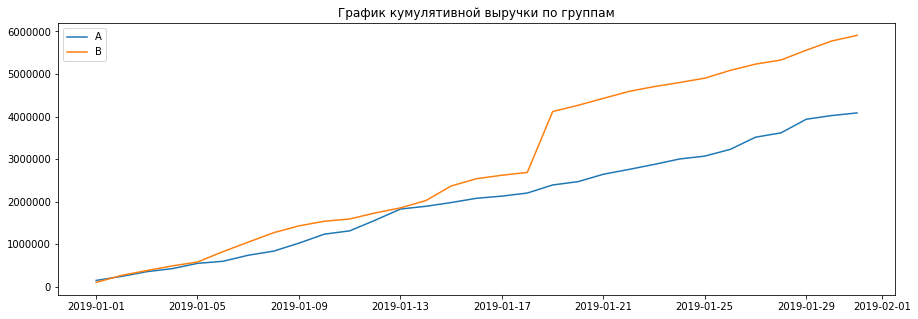

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# график выручки групп А, B
plt.figure(figsize=(15, 5))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

Таким образом, после 13 января 2019 года выручка группы В начинает опережать выручку группы А. 18-19 января 2019 года в выручке группе В происходит резкое увеличение. Значит в обозначенный период либо возросло число покупателей (больше чем обычно), либо совершились покупки на значительные суммы (больше чем обычно).

### График кумулятивного среднего чека по группам

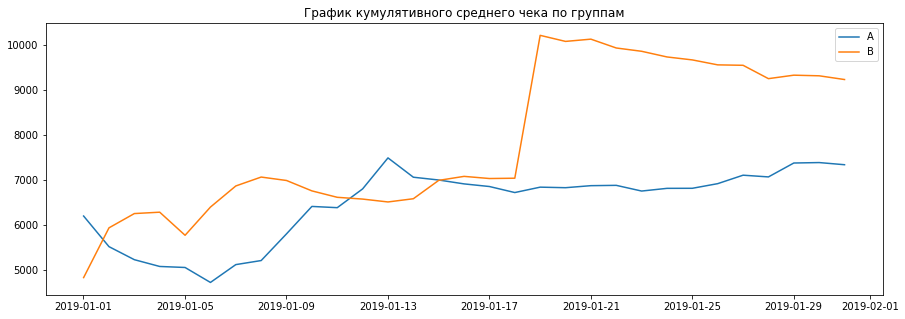

In [36]:
# график кумулятивного среднего чека по группам
plt.figure(figsize=(15, 5))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

Таким образом, в подтверждении тезиса о всплеске выручки в период 18-19 января 2019 года в группе В, следует отметить, что в указанный период произошел рост среднего чека, значит пользотели (пользователь) совершил крупную покупку (больше чем обычно).

После 21 января 2019 года средний чек в группе В начал снижатся. Влияние крупной покупки в период 18-19 января 2019 года плавно погашается (нормализуется).

### График относительного изменения кумулятивного среднего чека группы B к группе A

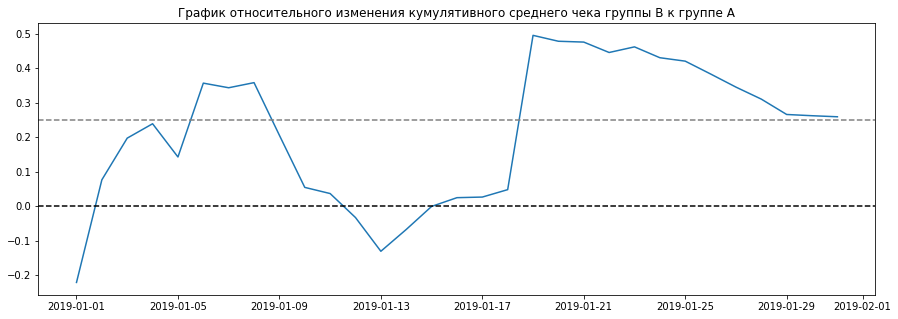

In [37]:
# объединяем данные в одном фрейме
merged_cumulative_revenue = (
    cumulative_revenue_A
    .merge(cumulative_revenue_B, 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['A', 'B'])
)

# график относительного изменения кумулятивного среднего чека группы В к группе А
plt.figure(figsize=(15, 5))

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show()

Таким образом, рост среднего чека на 50% в период 18-19 января 2019 года в группе В начинает нормализовыватся после 21 января 2019 года. Аномальная покупка в указанный период находит дополнительное подтверждение. 

###  График кумулятивной конверсии по группам

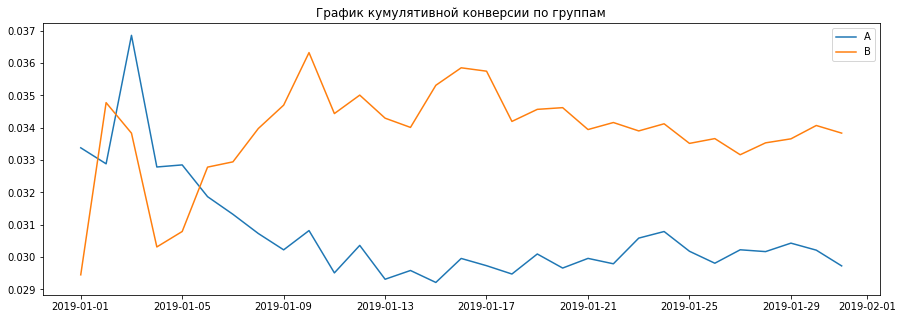

In [38]:
# расчет кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# данные кумулятивной конверсии по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# данные кумулятивной конверсии по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# график кумулятивной конверсии по группам
plt.figure(figsize=(15, 5))

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.legend()
plt.show()


# задаем масштаб осей
#plt.axis(["2019-01-05", '2019-01-09', 0, 0.015])

Таким образом, после 06 января 2019 года в группе В начинается опережающий рост числа покупателей. При этом, резкий рост числа покупателей наблюдается в период 10 января 2019 года, 15 января 2019 года. Возможно в данный период имеет место быть совершение большего числа покупок пользователями, чем обычно. 

В период после 21 января 2019 года влияние всплесков покупок 10, 15 января 2019 года нивилируется (номализуется). Графики накопленных покупок стабилизируется.

### График относительного изменения кумулятивной конверсии группы B к группе A

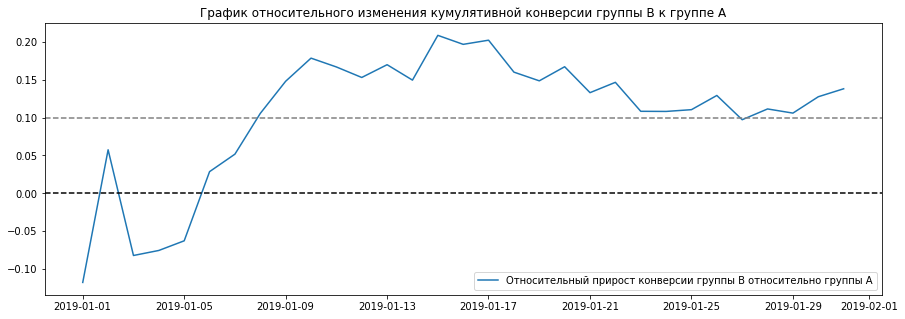

In [39]:
# объединяем данные в одном фрейме
merged_cumulative_conversions = (
    cumulative_data_A[['date','conversion']]
    .merge(cumulative_data_B[['date','conversion']], 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['A', 'B'])
)

# график относительного изменения кумулятивной конверсии группы В к группе А
plt.figure(figsize=(15, 5))

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

Таким образом, предполжение об аномальном числе покупок 10, 15 января 2019 года, находит подтверждение. После 21 января 2019 года число покупок нормализуется. График кумулятивной конверсии группы В стабилируется.

###  Точечный график количества заказов по пользователям

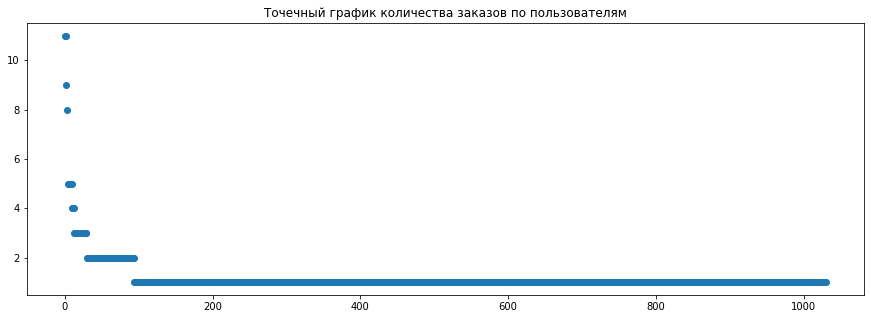

In [40]:
# расчет количества заказов на пользователя
orders_by_users = (
    orders
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .rename(columns={'transaction_id': 'orders'})
    .sort_values(by='orders', ascending=False)
)

# точечный график количества заказов по пользователям
plt.figure(figsize=(15, 5))

plt.scatter(pd.Series(range(0, len(orders_by_users))), orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

### 95-й и 99-й перцентили количества заказов на пользователя

In [41]:
# 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Итак, 5% пользователей совершили более двух заказов за период проведения теста; 1% пользователей совершил более четытех заказов за период проведения теста.

Таким образом, предположение о наличии аномально большого числа покупок на пользователя за период 18, 19 января 2021 года нашло дополнительное подтверждение.

### Точечный график стоимостей заказов

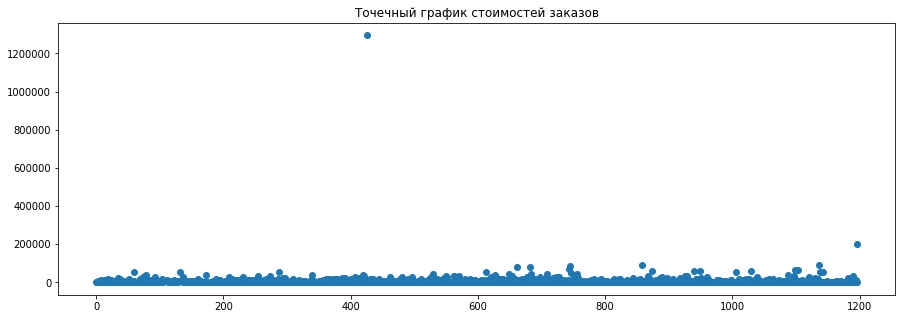

In [42]:
# точечный график стоимостей заказов
plt.figure(figsize=(15, 5))

plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

### 95-й и 99-й перцентили стоимости заказов

In [43]:
# 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Итак, стоимость 5-ти % заказов выше 28 000,00, стоимость 1% заказов, - выше 58 233,20. 

Таким образом, предположение о совершение аномально дорогих покупок в период 10, 15 января 2019 года нашло дополнительное подтверждение.

Таким образом, в период проведения теста в группе В имеют место быть аномалии, как по числу заказов на пользователя, так и по стоимости заказа.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. 

Н0 - внесенные в сервис изменения не привели к изменениям тестируемых метрик.

Н1 - внесенные в сервис изменения привели к изменениям тестируемых метрик.

Гипотеза двусторонняя, изменения могут быть, как улучшаюшие тестируемые метрики сервиса, так и ухудшающие их.

Далее подготовим данные для теста метрик.

In [44]:
# расчет количества пользователей группы теста А на опреденную дату
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

# расчет количества накопленных пользователей группы теста А к определнной дате
visitors_A_сummulative = (
    visitors_A_daily
    .apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
        .agg({'date': 'max', 
            'visitors_per_date_A': 'sum'}), 
        axis=1)
)
visitors_A_сummulative.columns = ['date', 'visitors_сummulative_A']

# расчет количества пользователей группы теста В на опреденную дату
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

# расчет количества накопленных пользователей группы теста В к определнной дате
visitors_B_cummulative = (
    visitors_B_daily
    .apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
        .agg({'date': 'max', 
             'visitors_per_date_B': 'sum'}), 
        axis=1)
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

# расчет суммарного количества заказов и выручки в группе теста А на определнную дату
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 
          'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

# расчет накопленного суммарного количества заказов и выручки в группе теста А к определнной дате
orders_A_cummulative = (
    orders_A_daily
    .apply(lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
           .agg({'date': 'max', 
                 'orders_per_date_A': 'sum', 
                 'revenue_per_date_A': 'sum'}),
           axis=1)
    .sort_values(by='date')
)
orders_A_cummulative.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

# расчет суммарного количества заказов и выручки в группе теста B на определнную дату
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 
          'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

# расчет накопленного суммарного количества заказов и выручки в группе теста B к определнной дате
orders_B_cummulative = (
    orders_B_daily
    .apply(lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
           .agg({'date': 'max', 
                 'orders_per_date_B': 'sum', 
                 'revenue_per_date_B': 'sum'}),
    axis=1)
    .sort_values(by='date')
)
orders_B_cummulative.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

# объединенная таблица для анализа результатов теста
test_data = (
    orders_A_daily
    .merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_сummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

# вывод результата расчетов
test_data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_сummulative_A,visitors_cummulative_B
0,2019-01-01 00:08:00,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-01-02 00:08:00,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-01-03 00:08:00,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-01-04 00:08:00,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-01-05 00:08:00,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Описание данных:**

- date — дата;
- orders_per_date_A — количество заказов в выбранную дату в группе A;
- revenue_per_date_A — суммарная выручка в выбранную дату в группе A;
- orders_per_date_B — количество заказов в выбранную дату в группе B;
- revenue_per_date_B — суммарная выручка в выбранную дату в группе B;
- orders_cummulative_A — суммарное число заказов до выбранной даты включительно в группе A;
- revenue_cummulative_A — суммарная выручка до выбранной даты включительно в группе A;
- orders_cummulative_B — суммарное количество заказов до выбранной даты включительно в группе B;
- revenue_cummulative_B — суммарная выручка до выбранной даты включительно в группе B;
- visitors_per_date_A — количество пользователей в выбранную дату в группе A;
- visitors_per_date_B — количество пользователей в выбранную дату в группе B;
- visitors_сummulative_A — количество пользователей до выбранной даты включительно в группе A;
- visitors_cummulative_B — количество пользователей до выбранной даты включительно в группе B.

Рассчитаем статистическую значимость различия в конверсии между группами.

Подготовим выборки групп А и В, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

Таким образом, число элементов выборок групп А и В — это количество пользователей, сумма всех элементов — количество заказов. 

Далее применим непараметрический U-критерий и оценим рассчитанное значение p-value. Примем решение о наличии или отсутвие различий в групах А и В.


In [45]:
# расчет количества заказов на пользователя группы теста А
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_A.columns = ['user_id', 'orders']

# расчет количества заказов на пользователя группы теста B
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_B.columns = ['user_id', 'orders']

# выборки А и В
sample_A = pd.concat(
    [orders_by_users_A['orders'], 
     pd.Series(0, index=np.arange(test_data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), 
               name='orders')], axis=0
)

sample_B = pd.concat(
    [orders_by_users_B['orders'],
     pd.Series(0, index=np.arange(test_data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), 
               name='orders')], axis=0
)

# расчет статистической значимости различий в конверсии между группами А и В
p_value_conversion_raw = st.mannwhitneyu(sample_A, sample_B, False, 'two-sided')[1]

# расчет относительной разницы конверсии группы В к группе А
relative_diff_conversion_raw = sample_B.mean() / sample_A.mean() - 1

# вывод
print(f'P-value: {p_value_conversion_raw:.3f}')
print(f'Относительная разница конверсии группы В к группе А: {relative_diff_conversion_raw:.2f}')

P-value: 0.017
Относительная разница конверсии группы В к группе А: 0.14


Таким образом, увеличение конверсии (числа покупок) на 14% в группе В по отношению к группе А статистически значимо.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [46]:
# расчет статистической значимости различий в среднем чеке между группами А и В
p_value_revenue_raw = st.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]

# расчет относительной разницы среднего чека группы В к группе А
relative_diff_revenue_raw = (
    orders[orders['group']=='B']['revenue'].mean() / 
    orders[orders['group']=='A']['revenue'].mean()-1
)

# вывод
print(f'P-value: {p_value_revenue_raw:.3f}')
print(f'Относительная разница среднего чека группы В к группе А: {relative_diff_revenue_raw:.2f}')

P-value: 0.729
Относительная разница среднего чека группы В к группе А: 0.26


Таким образом, статистически значимых различий между группами А и В по показателю среднего чека (выручки) нет. 

Увеличение среднего чека на 26% в группе В по отношению к группе А случайно, либо произошло в результате ошибки формирования выборки.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

95-й и 99-й перцентили средних чеков равны 28 000,00 и 58 233,20. 

95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа.

Примем за аномальных пользователей тех, кто совершил от двух заказов или совершил заказ дороже 28 000,00.

In [47]:
# срез пользователей с аномально большим числом заказов
users_with_many_orders = pd.concat(
    [orders_by_users_A[orders_by_users_A['orders'] > 2]['user_id'],
     orders_by_users_B[orders_by_users_B['orders'] > 2]['user_id']],
    axis=0
)

# срез пользователей с аномально дорогим заказом
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

# объединенные данные - аномальные пользователи по числу и стоимости заказов
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# вывод
print(f'Количество пользователей, с признаками аномалий: {abnormal_users.shape[0]}')

Количество пользователей, с признаками аномалий: 74


Подготовим отчищенные от обозначенных аномалий выборки групп А и В, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

Таким образом, число элементов отчищенных от аномалий выборок групп А и В — это количество пользователей, сумма всех элементов — количество заказов. 

Далее применим непараметрический U-критерий и оценим рассчитанное значение p-value. Примем решение о наличии или отсутвие различий в групах А и В.

In [48]:
# отчищенные выборки А и В
sample_A_cleaned = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
     pd.Series(0, index=np.arange(test_data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
               name='orders')], 
    axis=0)

sample_B_cleaned = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
     pd.Series(0, index=np.arange(test_data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
               name='orders')],
    axis=0)

# расчет статистической значимости различий в конверсии между группами А и В, выборки без аномалий
p_value_conversion_cleaned = st.mannwhitneyu(sample_A_cleaned, sample_B_cleaned, False, 'two-sided')[1]

# расчет относительной разницы конверсии группы В к группе Аб выборки без аномалий
relative_diff_conversion_cleaned = sample_B_cleaned.mean() / sample_A_cleaned.mean()-1

# вывод
print(f'P-value: {p_value_conversion_cleaned:.3f}')
print(f'Относительная разница конверсии группы В к группе А, расчет по данным без аномалий: {relative_diff_conversion_cleaned:.2f}')

P-value: 0.013
Относительная разница конверсии группы В к группе А, расчет по данным без аномалий: 0.17


Таким образом, увеличение конверсии (числа покупок) группы В относительно группы А по данным без аномалий на 17% - статистически значимо.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [49]:
# расчет статистической значимости различий в среднем чеке между группами А и В, данные без аномалий
p_value_revenue_cleaned = (
    st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
        True, 'two-sided')[1]
)

# расчет относительной разницы среднего чека группы В к группе А
relative_diff_revenue_cleaned = (
    orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A', 
                           np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()- 1
                         )
           
# вывод
print(f'P-value: {p_value_revenue_cleaned:.3f}')
print(f'Относительная разница среднего чека группы В к группе А, расчет по данным без аномалий: {relative_diff_revenue_cleaned:.2f}')

P-value: 0.738
Относительная разница среднего чека группы В к группе А, расчет по данным без аномалий: -0.02


Таким образом, статистически значимых различий между группами А и В по показателю среднего чека по данным без аномалий нет.

Снижение среднего чека на 2% в группе В по отношению к группе А случайно, либо произошло в результате ошибки формирования выборки.

### Решение по результатам теста

Тест остановить. Зафиксировать отсутствие различий между группами.

Тест продемонстрировал следующее. Согласно "сырым" данным число покупок в группе В на покупателя выросло (увеличилась конверсия) - тест зафиксировал статистически значимые различия в группах, однако, увеличение конверсии не привело к увеличению выручки (средний чек статистически значимо не изменился). 

Таким образом, покупатели стали совершать больше, но более мельких покупок. Эффекта для бизнеса вариант В не привнес.

Кроме того, согласно "очищенным" данным, конверсия снизилась - тест зафиксировал статистически значимые различия в группах, при неизменности среднего чека (статистически значимого различия в группах не выявлено). 

Аномалии, по числу совершенных покупок на пользователя (метрика конверсия) и среднему чеку (выручка) смещали среднюю оценку метрик в неверную сторону.

## Вывод

1. Согласно фреймворку ICE приобритеными явлются гипотезы №№ 9, 1 и 8.
2. Согласно фреймворку RICE приобритеными явлются гипотезы №№ 8, 3 и 1.
3. Смена позиций приоритета гипотез, согласно методике RICE, произошла в виду добавления фактора охвата. Так, охват гипотезы 8 в 10, охват гипотезы 3 в 8, охват гипотезы 1 в 3, при схожих трудозатрах (5 к 5 между 8-й и 9-й гпотезами; 3 к 6 между 3-й и 1-й гипотезами и 6 к 5 между 1-й и 8-й гипотезами) изменила общий скоринговый бал.
4. В период проведения теста в группе В имеют место быть аномалии, как по числу заказов на пользователя, так и по стоимости заказа.
5. Тест следует остановить. Зафиксировать отсутствие различий между группами. Согласно "сырым" данным число покупок в группе В на покупателя выросло (увеличилась конверсия) - тест зафиксировал статистически значимые различия в группах, однако, увеличение конверсии не привело к увеличению выручки (средний чек статистически значимо не изменился). Покупатели стали совершать больше, но более мельких покупок. Эффекта для бизнеса вариант В не привнес.
6. Согласно "очищенным" данным, конверсия снизилась - тест зафиксировал статистически значимые различия в группах, при неизменности среднего чека (статистически значимого различия в группах не выявлено). Аномалии, по числу совершенных покупок на пользователя (метрика конверсия) и среднему чеку (выручка) смещали среднюю оценку метрик в неверную сторону.